In [1]:
import pandas as pd

In [2]:
# Standard
import pandas as pd
import numpy as np
import os
# Pycaret
from pycaret.classification import *
# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
# Sklearn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
# Extras
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_sampleSubmission = pd.read_csv('sampleSubmission.csv')

In [6]:
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [7]:
df_train['total_mins'] = df_train['total_day_minutes'] + df_train['total_eve_minutes'] + df_train['total_night_minutes'] + df_train['total_intl_minutes']

In [8]:
df_train['total_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls'] + df_train['total_intl_calls']

In [9]:
df_train = df_train.astype({"total_mins": int,"total_day_minutes": int,"total_eve_minutes": int,"total_night_minutes": int,"total_intl_minutes": int})

In [10]:
df_train['international_plan'] = df_train['international_plan'].map({'yes':True ,'no':False})

In [11]:
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].map({'yes':True ,'no':False})

In [12]:
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].map({'yes':True ,'no':False})


In [13]:
df_train_not_churn = df_train[df_train['churn'] == 'no']

In [14]:
df_train_churn = df_train[df_train['churn'] == 'yes']

array([[<AxesSubplot: title={'center': 'account_length'}>,
        <AxesSubplot: title={'center': 'number_vmail_messages'}>,
        <AxesSubplot: title={'center': 'total_day_minutes'}>,
        <AxesSubplot: title={'center': 'total_day_calls'}>],
       [<AxesSubplot: title={'center': 'total_day_charge'}>,
        <AxesSubplot: title={'center': 'total_eve_minutes'}>,
        <AxesSubplot: title={'center': 'total_eve_calls'}>,
        <AxesSubplot: title={'center': 'total_eve_charge'}>],
       [<AxesSubplot: title={'center': 'total_night_minutes'}>,
        <AxesSubplot: title={'center': 'total_night_calls'}>,
        <AxesSubplot: title={'center': 'total_night_charge'}>,
        <AxesSubplot: title={'center': 'total_intl_minutes'}>],
       [<AxesSubplot: title={'center': 'total_intl_calls'}>,
        <AxesSubplot: title={'center': 'total_intl_charge'}>,
        <AxesSubplot: title={'center': 'number_customer_service_calls'}>,
        <AxesSubplot: title={'center': 'total_mins'}>],
 

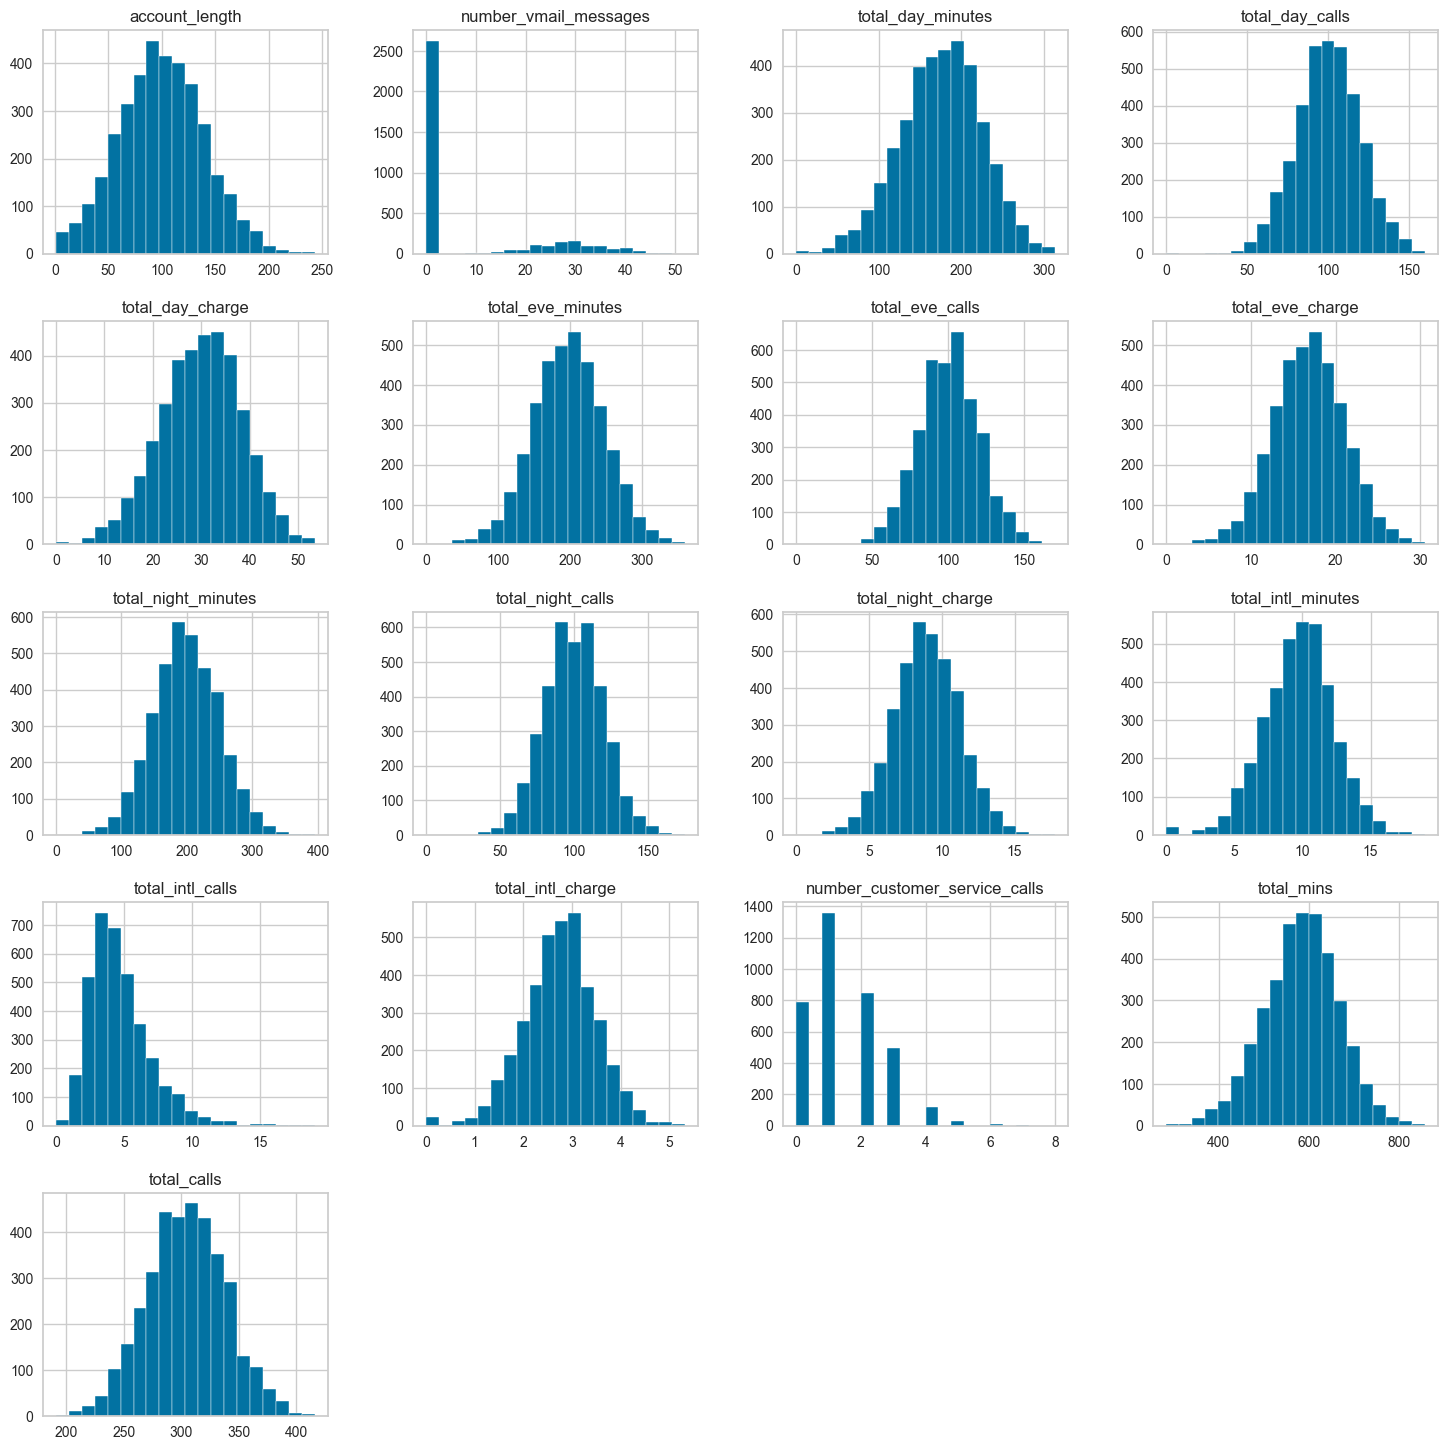

In [15]:
df_train_not_churn.hist(figsize=(18,18), bins = 20)


In [21]:
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_mins,total_calls
0,OH,107,area_code_415,False,True,26,161,123,27.47,195,...,254,103,11.45,13,3,3.70,1,no,625,332
1,NJ,137,area_code_415,False,False,0,243,114,41.38,121,...,162,104,7.32,12,5,3.29,0,no,539,333
2,OH,84,area_code_408,True,False,0,299,71,50.90,61,...,196,89,8.86,6,7,1.78,2,no,564,255
3,OK,75,area_code_415,True,False,0,166,113,28.34,148,...,186,121,8.41,10,3,2.73,3,no,512,359
4,MA,121,area_code_510,False,True,24,218,88,37.09,348,...,212,118,9.57,7,7,2.03,3,no,786,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,False,False,0,188,70,32.01,243,...,213,79,9.62,10,6,2.78,0,no,656,243
4246,WV,73,area_code_408,False,False,0,177,89,30.24,131,...,186,89,8.38,11,6,3.11,3,no,506,266
4247,NC,75,area_code_408,False,False,0,170,101,29.02,193,...,129,104,5.81,6,7,1.86,1,no,499,338
4248,HI,50,area_code_408,False,True,40,235,127,40.07,223,...,297,116,13.39,9,5,2.67,2,no,766,374


In [7]:
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


In [7]:
df_train[df_train[df_train.columns].isnull().any(1)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [8]:
df_train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [31]:
df_train['churn']

0       no
1       no
2       no
3       no
4       no
        ..
4245    no
4246    no
4247    no
4248    no
4249    no
Name: churn, Length: 4250, dtype: object

In [32]:
exp01 = setup(data=df_train, target="churn",normalize=True,
              feature_selection=True, remove_outliers=True,
              remove_multicollinearity=True, fix_imbalance=True,
              transformation=True,  pca=True,verbose = False,use_gpu = True )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Plus Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

In [34]:
top5 = compare_models(n_select = 5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:14:10
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [35]:
pull(top5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8592,0.5000,0.8592,0.7382,0.7941,0.0000,0.0000,1.482
catboost,CatBoost Classifier,0.8020,0.7829,0.8020,0.8528,0.8205,0.3566,0.3737,36.290
gbc,Gradient Boosting Classifier,0.8007,0.7802,0.8007,0.8542,0.8199,0.3594,0.3780,1.937
lightgbm,Light Gradient Boosting Machine,0.7946,0.7841,0.7946,0.8510,0.8150,0.3453,0.3642,2.585
et,Extra Trees Classifier,0.7929,0.7645,0.7929,0.8460,0.8125,0.3293,0.3460,1.132
rf,Random Forest Classifier,0.7896,0.7665,0.7896,0.8462,0.8103,0.3279,0.3457,1.057
knn,K Neighbors Classifier,0.7529,0.7430,0.7529,0.8396,0.7828,0.2805,0.3075,0.876
ada,Ada Boost Classifier,0.7442,0.7505,0.7442,0.8348,0.7757,0.2609,0.2876,0.998
nb,Naive Bayes,0.7233,0.7396,0.7233,0.8301,0.7595,0.2357,0.2648,0.709
qda,Quadratic Discriminant Analysis,0.7230,0.7591,0.7230,0.8349,0.7601,0.2476,0.2804,0.785


In [ ]:
tuned_top5 = [tune_model(i) for i in top5]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:23:37
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:24:31
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 2222, number of negative: 2222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 4444, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2226, number of negative: 2226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 4452, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2221, number of negative: 2

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:35:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:38:02
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 2222, number of negative: 2222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 4444, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging

In [ ]:
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

In [ ]:
blender = blend_models(estimator_list = top5)

In [ ]:
stacker = stack_models(estimator_list = top5)

In [ ]:
best = automl(optimize = 'Accuracy')

In [ ]:
pull(best)

In [ ]:
final_model = finalize_model(best)

In [ ]:
pull(final_model)


In [ ]:
predict_unseen = predict_model(best, data=df_test)

In [ ]:
df_result = predict_unseen[['id','prediction_label']]

In [ ]:
df_result.rename(columns={'prediction_label':'churn'},inplace = True)

In [ ]:
df_result.to_csv( 'out.csv',index=False,sep=',')

In [ ]:
df_train.describe()

In [ ]:
df_train

In [ ]:
import pycaret
